<a href="https://colab.research.google.com/github/Justabhi96/TF2.0/blob/master/9_CNN_Improving_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 51kB/s 
     |████████████████████████████████| 3.1MB 41.1MB/s 
     |████████████████████████████████| 501kB 40.4MB/s 


In [0]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
X_train.shape, y_train.shape

170500096/170498071 [==============================] - 11s 0us/step


((50000, 32, 32, 3), (50000,))

In [0]:
print(set(y_train))
K = len(set(y_train))
print("Number of Classes: ", K)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Number of Classes:  10


## Adding Batch Normalization

In [0]:
i = Input(shape = X_train[0].shape)
x = Conv2D(filters = 32, kernel_size= (3,3), strides = 2, activation = "relu")(i)
x = BatchNormalization()(x)
x = Conv2D(filters = 64, kernel_size= (3,3), strides = 2, activation = "relu")(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 128, kernel_size= (3,3), strides = 2, activation = "relu")(x)
x = BatchNormalization()(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = "softmax")(x)

In [0]:
norm_model = Model(i, x)
norm_model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

norm_r = norm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 70s 1ms/sample - loss: 1.5304 - accuracy: 0.4818 - val_loss: 1.2666 - val_accuracy: 0.5485
Epoch 2/10
50000/50000 [==============================] - 69s 1ms/sample - loss: 1.0778 - accuracy: 0.6207 - val_loss: 1.0124 - val_accuracy: 0.6410
Epoch 3/10
50000/50000 [==============================] - 69s 1ms/sample - loss: 0.8949 - accuracy: 0.6854 - val_loss: 1.0466 - val_accuracy: 0.6261
Epoch 4/10
50000/50000 [==============================] - 70s 1ms/sample - loss: 0.7520 - accuracy: 0.7364 - val_loss: 0.9145 - val_accuracy: 0.6839
Epoch 5/10
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.6335 - accuracy: 0.7763 - val_loss: 0.9144 - val_accuracy: 0.6976
Epoch 6/10
50000/50000 [==============================] - 69s 1ms/sample - loss: 0.5382 - accuracy: 0.8100 - val_loss: 1.0050 - val_accuracy: 0.6727
Epoch 7/10
50000/50000 [==============================] 

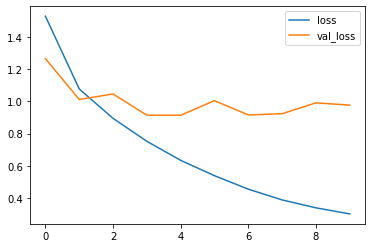

In [0]:
# loss per iteration
plt.plot(norm_r.history["loss"], label = "loss")
plt.plot(norm_r.history["val_loss"], label = "val_loss")
plt.legend()

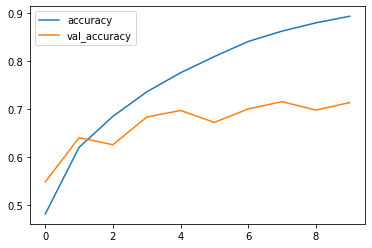

In [0]:
# accuracy per iteration
plt.plot(norm_r.history["accuracy"], label = "accuracy")
plt.plot(norm_r.history["val_accuracy"], label = "val_accuracy")
plt.legend()

## Two convolution layers with normalization before max pooling

In [0]:
i = Input(shape = X_train[0].shape)
x = Conv2D(filters = 32, kernel_size= (3,3), activation = "relu", padding="same")(i)
x = BatchNormalization()(x)
x = Conv2D(filters = 32, kernel_size= (3,3), activation = "relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2))(x)

x = Conv2D(filters = 64, kernel_size= (3,3), activation = "relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 64, kernel_size= (3,3), activation = "relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2))(x)

x = Conv2D(filters = 128, kernel_size= (3,3), activation = "relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 128, kernel_size= (3,3), activation = "relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2))(x)
# x = GlobalMaxPooling2D()(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = "softmax")(x)

In [0]:
model = Model(i, x)
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 5)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 581s 12ms/sample - loss: 1.4743 - accuracy: 0.5261 - val_loss: 0.9547 - val_accuracy: 0.6677
Epoch 2/5
50000/50000 [==============================] - 581s 12ms/sample - loss: 0.8596 - accuracy: 0.6995 - val_loss: 1.0674 - val_accuracy: 0.6474
Epoch 3/5
50000/50000 [==============================] - 578s 12ms/sample - loss: 0.7016 - accuracy: 0.7599 - val_loss: 0.8029 - val_accuracy: 0.7359
Epoch 4/5
50000/50000 [==============================] - 578s 12ms/sample - loss: 0.5905 - accuracy: 0.7961 - val_loss: 0.6648 - val_accuracy: 0.7757
Epoch 5/5
50000/50000 [==============================] - 583s 12ms/sample - loss: 0.5033 - accuracy: 0.8268 - val_loss: 0.6349 - val_accuracy: 0.7932


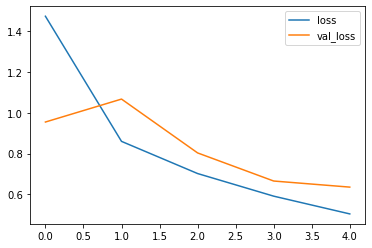

In [0]:
# loss per iteration
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend()

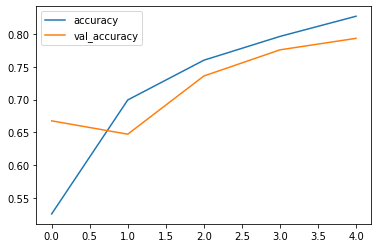

In [0]:
# accuracy per iteration
plt.plot(r.history["accuracy"], label = "accuracy")
plt.plot(r.history["val_accuracy"], label = "val_accuracy")
plt.legend()

# Data Augmentation

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# We create a new model object because if you run this code after running the previous code
# it will start from where it left off
augmented_model = Model(i, x)
augmented_model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

batch_size = 32
data_generator = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0]//batch_size

aug_r = augmented_model.fit_generator(train_generator, validation_data=(X_test, y_test), 
                                      steps_per_epoch = steps_per_epoch, epochs = 5)

Epoch 1/5
1562/1562 [==============================] - 587s 376ms/step - loss: 0.7750 - accuracy: 0.7362 - val_loss: 0.7204 - val_accuracy: 0.7634
Epoch 2/5
1562/1562 [==============================] - 589s 377ms/step - loss: 0.6964 - accuracy: 0.7621 - val_loss: 0.6703 - val_accuracy: 0.7799
Epoch 3/5
1562/1562 [==============================] - 590s 378ms/step - loss: 0.6363 - accuracy: 0.7819 - val_loss: 0.6969 - val_accuracy: 0.7655
Epoch 4/5
1562/1562 [==============================] - 604s 387ms/step - loss: 0.5940 - accuracy: 0.7986 - val_loss: 0.7247 - val_accuracy: 0.7640
Epoch 5/5
1562/1562 [==============================] - 606s 388ms/step - loss: 0.5609 - accuracy: 0.8069 - val_loss: 0.5223 - val_accuracy: 0.8235


In [0]:
augmented_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1849